<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

---
## Problem Statement
You are a data scientist in a well known cosmetic company. The company has an online store and discussion forums for all the product categories. The department in charge of the website and forum has complained that customers are posting their feedbacks and discussions for Makeup and Perfumes in the wrong forums. Due to this, you colleagues have to manually comb through the discussion forums to identify posts that have been posted in the wrong forum. They found this time consuming and have turned to the data science department to look for a better solution.

You have been tasked by your direct supervisor to create a classification model to identify whether posts should be classified in the Makeup or Perfumes column. At the same time, use the analysis to identify useful insights that could be used by the marketing department for their marketing efforts.

### Contents:
- [Background](#Background)
- [Datasets Used](#Datasets-Used)
- [Extraction of Data](#Extraction-of-Data)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Pre-processing text data](#Pre-processing-text-data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modelling](#Modelling)
- [Regularisation Regression](#Regularisation-Regression)
- [Model Test Results](#Model-Test-Results)
- [Predicting Sale Prices in Test Dataset](#Predicting-Sale-Prices-in-Test-Dataset)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Reddit is a network of more than 100,000 communities where people can dive into anything through experiences built around their interests, hobbies and passions. Reddit users submit, vote and comment on content, stories and discussions about the topics they care about the most. From pets to parenting, there’s a community for everybody on Reddit and with more than 52 million daily active users, it is home to the most open and authentic conversations on the internet. [(source)](https://event.adweek.com/challenger-brands-2022/sponsor/199604/reddit) 

Subreddits are subsidiary threads or categories within the Reddit website. They allow users to focus on a specific interest or topic in posting content that gets voted up or down by relevance and user preference. [(source)](https://www.techopedia.com/definition/31607/subreddit)

## Datasets Used

As the forums were newly created, there isn't sufficient data for us to perform analysis on. As such, we have extract posts from the Makeup and Perfume subreddits to form our dataset.

Information found in the datasets include the title and selftext of the posts. Please refer to the data dictionary for more infomation on the columns extracted.

## Extraction of Data

Please refer to **"1. Extraction of Data"** for the steps done for the extraction of data from Reddit.

## Data Import and Cleaning

**1. Importing of libraries**

In [1]:
# Import libraries
import pandas as pd
import string
import re
import nltk
import numpy as np
import pandas as pd
import sklearn

# Chart plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

# Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**2. Importing of datasets being used**

We have imported the `perfumes_df` and `makeup_df` datasets which we have extracted in **"1. Extraction of Data"**.

In [2]:
# Import datasets:
perfumes_df = pd.read_csv("../datasets/perfumes_df.csv")
makeup_df = pd.read_csv("../datasets/makeup_df.csv")

**3.1. Display datasets**

Display the first 5 rows of the imported datasets

In [3]:
# Setting to display all the columns
pd.set_option("display.max_columns", None)

# Display first 5 rows of the datasets
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


,Unnamed: 0,subreddit,title,selftext
0,0,Perfumes,Alfred Sung edt + Sung Homme,NaN
1,1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...
2,2,Perfumes,Talk about bottle designs. Interesting indeed,NaN
3,3,Perfumes,Zara,Long lasting Zara perfume for women?
4,4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN



First 5 rows of the "Makeup" dataset:


,Unnamed: 0,subreddit,title,selftext
0,0,Makeup,Eyeshadow Fallout,1. Do any of you experience eyeshadow fallout?...
1,1,Makeup,I have got some education on crypto I’ll like ...,[removed]
2,2,Makeup,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,Does anyone know a lip liner similar to this c...
3,3,Makeup,Eyeshadow Fallout Question,My apologies - my last post wasn't very clear ...
4,4,Makeup,Make up to cover a tattoo in an extreme climate,"Hi, I’m a guy that’s never wore make up before..."


The `Unnamed: 0` column is not required as it only contains the index of the dataset. As such, we will drop the column.

In [4]:
# Drop "Unnamed: 0" column from both datasets
perfumes_df.drop('Unnamed: 0', axis = 1, inplace = True)
makeup_df.drop('Unnamed: 0', axis = 1, inplace = True)

# Display first 5 rows of the datasets after dropping column
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


,subreddit,title,selftext
0,Perfumes,Alfred Sung edt + Sung Homme,NaN
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN
3,Perfumes,Zara,Long lasting Zara perfume for women?
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN



First 5 rows of the "Makeup" dataset:


,subreddit,title,selftext
0,Makeup,Eyeshadow Fallout,1. Do any of you experience eyeshadow fallout?...
1,Makeup,I have got some education on crypto I’ll like ...,[removed]
2,Makeup,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,Does anyone know a lip liner similar to this c...
3,Makeup,Eyeshadow Fallout Question,My apologies - my last post wasn't very clear ...
4,Makeup,Make up to cover a tattoo in an extreme climate,"Hi, I’m a guy that’s never wore make up before..."


**3.2. Number of rows and columns in datasets**

Check the number of rows and columns in the datasets.

In [5]:
# Display the number of rows and columns in the datasets
print("\"Perfume\" dataset:")
print(f"(Rows, Column): {perfumes_df.shape}")
print("")
print("\"Makeup\" dataset:")
print(f"(Rows, Column): {makeup_df.shape}")

"Perfume" dataset:
(Rows, Column): (3002, 3)

"Makeup" dataset:
(Rows, Column): (3220, 3)


**4.1. Check datasets for null values**

In [6]:
# Check null values found in both datasets
print('Null values in "Perfume" dataset:')
print(perfumes_df.isnull().sum().to_string())
print("")
print('Null values in "Makeup" dataset:')
print(makeup_df.isnull().sum().to_string())

Null values in "Perfume" dataset:
subreddit       0
title           0
selftext     1452

Null values in "Makeup" dataset:
subreddit      0
title          0
selftext     251


Noted that there are quite a lot of rows that have no selftext. However, there are no null values found in the title. This is because people could already have stated their questions/discussion topic in title and would choose to leave the selftext portion empty instead of repeating them. Thus the title would also contain useful information that we could use in our analysis. As such, we will combine both the title and self text so that we can analysis both sections together.

**4.3. Remove words such as '[removed]' and '[deleted]'**

However, before we combine the two columns, we will need to remove words such as '[removed]' and '[deleted]'. These words just means that the posts have been removed, deleted or that there are no texts included in the body of the posts and thus should not be included in the analysis.

In [7]:
# Remove the words "[removed]" and "[deleted]" from the selftext column from both datasets
perfumes_df['selftext'] = perfumes_df['selftext'].replace('[removed]',"")
perfumes_df['selftext'] = perfumes_df['selftext'].replace('[deleted]',"")
makeup_df['selftext'] = makeup_df['selftext'].replace('[removed]',"")
makeup_df['selftext'] = makeup_df['selftext'].replace('[deleted]',"")

# Check the datasets to make sure that the words have been removed
print('Perfumes Dataset:')
display(perfumes_df[perfumes_df['selftext']=='[removed]'])
print("")
print('Perfumes Dataset:')
display(perfumes_df[perfumes_df['selftext']=='[deleted]'])
print("")
print('Makeup Dataset:')
display(makeup_df[makeup_df['selftext']=='[removed]'])
print("")
print('Makeup Dataset:')
display(makeup_df[makeup_df['selftext']=='[deleted]'])

Perfumes Dataset:


,subreddit,title,selftext



Perfumes Dataset:


,subreddit,title,selftext



Makeup Dataset:


,subreddit,title,selftext



Makeup Dataset:


,subreddit,title,selftext


Now that the words have been removed, lets combine the `title` and `selftext` columns.

**4.4. Combine the `title` and `selftext` columns.**

In [8]:
# Drop rows with null values found in the 'selftext' column
perfumes_df['title_and_selftext'] = perfumes_df['title'] + " " + perfumes_df['selftext'].astype(str)
makeup_df['title_and_selftext'] = makeup_df['title'] + " " +makeup_df['selftext'].astype(str)

# Display first 5 rows of the datasets
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


,subreddit,title,selftext,title_and_selftext
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme nan
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed nan
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ..."



First 5 rows of the "Makeup" dataset:


,subreddit,title,selftext,title_and_selftext
0,Makeup,Eyeshadow Fallout,1. Do any of you experience eyeshadow fallout?...,Eyeshadow Fallout 1. Do any of you experience ...
1,Makeup,I have got some education on crypto I’ll like ...,,I have got some education on crypto I’ll like ...
2,Makeup,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,Does anyone know a lip liner similar to this c...,Is Rimmel 1000 Kisses Coffee Bean lip liner di...
3,Makeup,Eyeshadow Fallout Question,My apologies - my last post wasn't very clear ...,Eyeshadow Fallout Question My apologies - my l...
4,Makeup,Make up to cover a tattoo in an extreme climate,"Hi, I’m a guy that’s never wore make up before...",Make up to cover a tattoo in an extreme climat...


Now that we have combined the two columns, let us check for null values in the column.

In [9]:
# Check null values in the new combined column
print('Null values in "Perfume" dataset:')
print(perfumes_df.isnull().sum().to_string())
print("\n")
print('Null values in "Makeup" dataset:')
print(makeup_df.isnull().sum().to_string())

Null values in "Perfume" dataset:
subreddit                0
title                    0
selftext              1452
title_and_selftext       0


Null values in "Makeup" dataset:
subreddit               0
title                   0
selftext              251
title_and_selftext      0


There are no null values in the `title_and_selftext` column. However, the word 'nan' is showing up in the `title_and_self` column. NaN actually refers to null cell and this is not a word that we would like to see in our analysis. Thus, we will remove this word from the column as well.

**4.5. Remove "nan" from the `title_and_selftext` column.**

In [10]:
# Remove the word "nan" from the "title_and_selftext" column
perfumes_df['title_and_selftext'] = perfumes_df['title_and_selftext'].str.replace("nan", "")
makeup_df['title_and_selftext'] = makeup_df['title_and_selftext'].str.replace("nan", "")

# Check to make sure that the words have been removed
print("\"Perfume\" dataset:")
display(perfumes_df[perfumes_df['selftext'].isnull()].head())
print("")
print("\"Makeup\" dataset:")
display(makeup_df[makeup_df['selftext'].isnull()].head())

"Perfume" dataset:


,subreddit,title,selftext,title_and_selftext
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ..."
5,Perfumes,SORBETTO Parfum Rollerball Fragrance .33 fl oz.,NaN,SORBETTO Parfum Rollerball Fragrance .33 fl oz.
7,Perfumes,Lucky me :) MFK set one sale,NaN,Lucky me :) MFK set one sale



"Makeup" dataset:


,subreddit,title,selftext,title_and_selftext
63,Makeup,how can i tell if a girl has make-up on her fa...,NaN,how can i tell if a girl has make-up on her fa...
81,Makeup,Is IT cosmetics CC cream silicone or water based?,NaN,Is IT cosmetics CC cream silicone or water bas...
83,Makeup,anyone know if grande lash works on brows too?...,NaN,anyone know if grande lash works on brows too?...
95,Makeup,hiiii!! how can i do my makeup to replicate so...,NaN,hiiii!! how can i do my makeup to replicate so...
96,Makeup,One of the bags underneath my eyes is larger t...,NaN,One of the bags underneath my eyes is larger t...


Now that all the irrelevant words have been removed, the datasets are really for further processing and analysis!

**5. Merging of datasets**

In [11]:
# Merge the both datasets into one dataset
combined_df = pd.merge(perfumes_df, makeup_df, how = 'outer')

# Check the number of rows and columns in the new dataset
print("\"Combined\" dataset:")
print(f"(Rows, Column): {combined_df.shape}")

"Combined" dataset:
(Rows, Column): (6222, 4)


**6. Exporting of datasets**

In [12]:
# Exporting of merged datasets to csv
perfumes_df.to_csv('../datasets/perfumes_df_cleaned.csv')
makeup_df.to_csv('../datasets/makeup_df_cleaned.csv')
combined_df.to_csv('../datasets/combined_df_cleaned.csv')

## Data Dictionary

<br>**Dataset name: `perfumes_df`**
<br>This dataset contains subreddit posts extracted from the "Perfumes" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|perfumes_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|perfumes_df|Title of the posts found in the subreddit.|
|selftext|string|perfumes_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|perfumes_df|Combindation of the title and selftext column.|

<br>**Dataset name: `makeup_df`**
<br>This dataset contains subreddit posts extracted from the "Makeup" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|makeup_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|makeup_df|Title of the posts found in the subreddit.|
|selftext|string|makeup_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|makeup_df|Combindation of the title and selftext column.|

<br>**Dataset name: `combined_df`**
<br>This dataset contains subreddit posts extracted from both the "Perfumes" and "Makeup" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|combined_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|combined_df|Title of the posts found in the subreddit.|
|selftext|string|combined_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|combined_df|Combindation of the title and selftext column.|

## Pre-processing text data

Now we will clean the text data so that we can highlight attributes that we want our Machine Learning models to pick up on.

**1. Convert Subreddit Labels to Binary**

First, we will convert the subreddit labels to binary so that the model will be able to pickup the labels.

In [13]:
# Convert subreddit labels to binary
combined_df['label'] = combined_df['subreddit'].map({'Perfumes': 0, 'Makeup': 1})

**2. Remove punctuations**

Remove the punctuations as these are not required in text analysis.

In [14]:
# Define function to remove punctuation
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# Remove punctuation from the 'title and selftext' column
combined_df['title_and_selftext_clean'] = combined_df['title_and_selftext'].apply(lambda x: remove_punct(x))

# Display the dataset after the changes
display(combined_df.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme,0,Alfred Sung edt Sung Homme
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...,0,I am looking for a suitable perfume DeFacto ...
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed,0,Talk about bottle designs Interesting indeed
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?,0,Zara Long lasting Zara perfume for women
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ...",0,Looking for an alternative of Tommy Girl Now P...


**2. Tokenization**

Split the text into smaller pieces, ie. single words.

In [15]:
# Define function to tokenize the column
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# Tokenize the 'title and selftext' column
combined_df['title_and_selftext_tokenized'] = combined_df['title_and_selftext_clean'].apply(
    lambda x: tokenize(x.lower()))

# Display the dataset after the changes
display(combined_df.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean,title_and_selftext_tokenized
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme,0,Alfred Sung edt Sung Homme,"[alfred, sung, edt, sung, homme, ]"
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...,0,I am looking for a suitable perfume DeFacto ...,"[i, am, looking, for, a, suitable, perfume, de..."
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed,0,Talk about bottle designs Interesting indeed,"[talk, about, bottle, designs, interesting, in..."
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?,0,Zara Long lasting Zara perfume for women,"[zara, long, lasting, zara, perfume, for, women]"
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ...",0,Looking for an alternative of Tommy Girl Now P...,"[looking, for, an, alternative, of, tommy, gir..."


**3. Remove stopwords**

Remove the words that have very little meaning as these words are not going to be helpful in our analysis.

In [16]:
# Obtain stopwords from the NLTK(Natural Language Toolkit) in Python
stopword = nltk.corpus.stopwords.words('english')

# Define function to remove stop words
def remove_stopwords(tokenized_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

# Remove stopwords from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_tokenized'].apply(
    lambda x: remove_stopwords(x))

# Display the dataset after the changes
display(combined_df.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean,title_and_selftext_tokenized,title_and_selftext_no_stop
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme,0,Alfred Sung edt Sung Homme,"[alfred, sung, edt, sung, homme, ]","[alfred, sung, edt, sung, homme, ]"
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...,0,I am looking for a suitable perfume DeFacto ...,"[i, am, looking, for, a, suitable, perfume, de...","[looking, suitable, perfume, defacto, orange, ..."
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed,0,Talk about bottle designs Interesting indeed,"[talk, about, bottle, designs, interesting, in...","[talk, bottle, designs, interesting, indeed, ]"
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?,0,Zara Long lasting Zara perfume for women,"[zara, long, lasting, zara, perfume, for, women]","[zara, long, lasting, zara, perfume, women]"
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ...",0,Looking for an alternative of Tommy Girl Now P...,"[looking, for, an, alternative, of, tommy, gir...","[looking, alternative, tommy, girl, please, su..."


**4. Lemmatization**

Convert the words into their most basic forms for analysis.

In [17]:
## Instantiate the function
wn = nltk.WordNetLemmatizer()

# Define function for lemmatization
def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

# Lemmatize the 'title and selftext' column
combined_df['title_and_selftext_lemmatized'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

display(combined_df.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean,title_and_selftext_tokenized,title_and_selftext_no_stop,title_and_selftext_lemmatized
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme,0,Alfred Sung edt Sung Homme,"[alfred, sung, edt, sung, homme, ]","[alfred, sung, edt, sung, homme, ]","[alfred, sung, edt, sung, homme, ]"
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...,0,I am looking for a suitable perfume DeFacto ...,"[i, am, looking, for, a, suitable, perfume, de...","[looking, suitable, perfume, defacto, orange, ...","[looking, suitable, perfume, defacto, orange, ..."
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed,0,Talk about bottle designs Interesting indeed,"[talk, about, bottle, designs, interesting, in...","[talk, bottle, designs, interesting, indeed, ]","[talk, bottle, design, interesting, indeed, ]"
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?,0,Zara Long lasting Zara perfume for women,"[zara, long, lasting, zara, perfume, for, women]","[zara, long, lasting, zara, perfume, women]","[zara, long, lasting, zara, perfume, woman]"
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ...",0,Looking for an alternative of Tommy Girl Now P...,"[looking, for, an, alternative, of, tommy, gir...","[looking, alternative, tommy, girl, please, su...","[looking, alternative, tommy, girl, please, su..."


**5. Count Vectorizer**

Convert text data into a structured, numeric X dataframe by using CountVectorizer.

In [18]:
def countvec_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatizing)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)

    # Returns the number of rows and columns of X_counts
    print(f'R(Rows, Columns): {X_counts.shape}')

    # Returns the unique words across all text messages
    print(count_vect.get_feature_names())

print(countvec_check(combined_df['title_and_selftext_no_stop']))

R(Rows, Columns): (6222, 15849)
['', '0', '001', '002', '0022', '003', '00s', '01', '010ounce', '011', '012', '013', '015', '02', '020', '029gram', '03', '030', '03w', '04', '043shade', '05', '052', '062', '063', '0647', '069gram', '074', '0746', '075', '075g', '0787', '08338913697kitchen', '095g', '099', '1', '10', '100', '1000', '10000', '100130', '100150', '100150usd', '100200', '100after', '100chinese', '100ml', '100ml33oz', '100th', '100w', '101', '1010', '10100', '1012', '101200midrange', '1015', '1015x', '101contouring', '102', '1020', '1030', '105ml', '1068', '1077', '1079', '1099', '10am', '10b', '10cad', '10day', '10ish', '10k', '10ml', '10oz', '10th', '10x', '10yrs', '11', '110', '1100', '11000', '110s', '111shade', '112', '1120', '115', '116i', '1177', '117g', '118', '1199', '11th', '12', '120', '1200', '120105', '12058', '12085', '120c', '1212', '121oxooctadecyl', '12345', '125', '1250', '126k', '128', '128g', '1295', '1299', '12hexanediol', '12hour', '12ish', '12m', '12mo

From the above, it seems like there were a lot of words with numbers that doesn't really make sense on its own. There are also a lot of non-english words as well. We shall remove them from the analysis.

**6. Remove words with numbers and non-english words**

Remove words with numbers and non-english that doesn't really make sense in this analysis.

In [19]:
# Define function to remove words with numbers
def remove_num(text):
    text = (re.sub('\d+', '', word) for word in text)
    text = [word for word in text if word != '']
    return text

def remove_non_english(text):
    text = [word for word in text if word.isascii() == True]
    return text

# Remove words with numbers from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: remove_num(x))

# Remove words with non-english words from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: remove_non_english(x))

# Check the dataset after removing numbers and non-english words
display(combined_df.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean,title_and_selftext_tokenized,title_and_selftext_no_stop,title_and_selftext_lemmatized
0,Perfumes,Alfred Sung edt + Sung Homme,NaN,Alfred Sung edt + Sung Homme,0,Alfred Sung edt Sung Homme,"[alfred, sung, edt, sung, homme, ]","[alfred, sung, edt, sung, homme]","[alfred, sung, edt, sung, homme, ]"
1,Perfumes,I am looking for a suitable perfume!!!!,DeFacto Orange Mon Cheri perfume is no long...,I am looking for a suitable perfume!!!! DeFac...,0,I am looking for a suitable perfume DeFacto ...,"[i, am, looking, for, a, suitable, perfume, de...","[looking, suitable, perfume, defacto, orange, ...","[looking, suitable, perfume, defacto, orange, ..."
2,Perfumes,Talk about bottle designs. Interesting indeed,NaN,Talk about bottle designs. Interesting indeed,0,Talk about bottle designs Interesting indeed,"[talk, about, bottle, designs, interesting, in...","[talk, bottle, designs, interesting, indeed]","[talk, bottle, design, interesting, indeed, ]"
3,Perfumes,Zara,Long lasting Zara perfume for women?,Zara Long lasting Zara perfume for women?,0,Zara Long lasting Zara perfume for women,"[zara, long, lasting, zara, perfume, for, women]","[zara, long, lasting, zara, perfume, women]","[zara, long, lasting, zara, perfume, woman]"
4,Perfumes,"Looking for an alternative of Tommy Girl Now, ...",NaN,"Looking for an alternative of Tommy Girl Now, ...",0,Looking for an alternative of Tommy Girl Now P...,"[looking, for, an, alternative, of, tommy, gir...","[looking, alternative, tommy, girl, please, su...","[looking, alternative, tommy, girl, please, su..."


In [20]:
# Check the feature names after removing words with numbers
print(countvec_check(combined_df['title_and_selftext_no_stop']))

R(Rows, Columns): (6222, 14824)
['aampa', 'aayaa', 'ab', 'abbott', 'abercrombie', 'abh', 'abhnorvina', 'ability', 'abit', 'able', 'abnormal', 'abnormally', 'abolish', 'abosulte', 'aboutface', 'abouti', 'aboveaverage', 'aboveunder', 'abricot', 'abroad', 'absence', 'absinth', 'absinthe', 'absoloute', 'absolu', 'absolue', 'absolute', 'absolutely', 'absolutley', 'absorb', 'absorbed', 'absorbing', 'absorbmeld', 'absorbs', 'abstract', 'absurd', 'absurdly', 'abt', 'academia', 'academianight', 'academic', 'academy', 'acampora', 'accent', 'accentuate', 'accentuated', 'accentuates', 'accentuating', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accessiblediy', 'accessing', 'accessory', 'accident', 'accidental', 'accidentally', 'accommodate', 'accompanied', 'accomplish', 'accomplishes', 'accord', 'according', 'accordingly', 'account', 'accountant', 'accredited', 'accurate', 'accurately', 'accusation', 'accused', 'accutane', 'ace', 'acetate', 'acetone', 

All the words with numbers and non-english words have now been removed.

In [21]:
def sparsematrix_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatizing)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Apply column name to the dataframe
    X_counts_df.columns = count_vect.get_feature_names()
    
    return X_counts_df

combined_sparse_matrix = sparsematrix_check(combined_df['title_and_selftext_no_stop'])

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {combined_sparse_matrix.shape}')

Total number of rows and columns:
(Rows, Columns): (6222, 14824)


Now we have a count matrix with 14,824 unique words. Now we are ready to do some Exploratory Data Analysis! Let's look at the top words found in each subreddit.

## Exploratory Data Analysis

**1. Most Common Words**

Let's find the top 20 words for each subreddit.

**1.1. Most Common Words in Perfumes Subreddit**

In [22]:
# Filter combined_df for "Perfumes"
perfumes_df_cleaned = combined_df[combined_df['subreddit'] == 'Perfumes']

# Filter combined_df for "Makeup"
makeup_df_cleaned = combined_df[combined_df['subreddit'] == 'Makeup']

# Create sparse_matrix for both perfumes and makeup
perfumes_sparse_matrix = sparsematrix_check(perfumes_df_cleaned['title_and_selftext_no_stop'])
makeup_sparse_matrix = sparsematrix_check(makeup_df_cleaned['title_and_selftext_no_stop'])

In [23]:
# Define function to find top words
def top_words(value, num):
    return value.sum().sort_values(ascending = False).head(num)

# Find the top 50 words in perfume subreddit
print('Top 50 words in Perfumes subreddit:')
print("")
print(top_words(perfumes_sparse_matrix, 50).to_string())

Top 50 words in Perfumes subreddit:

perfume           2994
like              1364
scent             1226
smell             1182
fragrance          950
know               682
looking            615
anyone             603
one                577
love               571
im                 502
would              501
find               461
bottle             450
something          450
similar            424
note               421
help               413
good               377
really             370
want               354
get                341
recommendation     316
also               292
new                285
sweet              281
vanilla            279
think              250
year               236
dupe               231
last               227
buy                225
body               225
best               223
time               216
collection         210
discontinued       208
make               207
long               203
much               203
got                199
wear               1

Noted that 'perfume' is the word that is most mentioned in the posts found in the 'Perfume' subreddit. Since, it is directly related to the topic that we are looking at, we will remove this word. Also, there are further stopwords like 'like', 'anyone', 'one', 'im', etc that doesn't really make sense as well. As such, we will remove these words from the `perfumes_df_cleaned` dataset. 

From the top 50 words, we will try to identify and remove as many stop words as possible. After that, we will look at the revised top 20 words to make sure that all of the stopwords have been removed from the list.

**1.2. Remove Further Stopwords from the Perfumes Subreddit**

In [24]:
# Define function to remove stop words
def remove_stopwords(tokenized_list, stopword_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword_list]
    return text

# List the words that we want to remove
stopwords_perfume = ['perfume', 'like', 'know', 'looking', 'anyone', 'im', 'would', 'find', 'something', 
                     'similar', 'really', 'want', 'get', 'also', 'new', 'think', 'year', 'dupe', 'one', 'help', 
                     'buy', 'make', 'perfumes', 'got', 'much', 'de', 'good', 'need', 'day', 'hi', 'please', 
                     'thank', 'suggestion', 'could', 'favorite', 'tried', 'thanks', 'ago']

# Remove stopwords from the 'title and selftext' column
perfumes_df_cleaned['title_and_selftext_no_stop'] = perfumes_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: remove_stopwords(x, stopwords_perfume))

# Recreate the sparse matrix for Perfume subreddit
perfumes_sparse_matrix = sparsematrix_check(perfumes_df_cleaned['title_and_selftext_no_stop'])

# Display the new top 20 words after the change
print('Top 20 words in Perfumes subreddit (Revised):')
print("")
print(top_words(perfumes_sparse_matrix, 20).to_string())

Top 20 words in Perfumes subreddit (Revised):

scent             1226
smell             1182
fragrance          950
love               571
bottle             450
note               421
recommendation     316
sweet              281
vanilla            279
last               227
body               225
best               223
time               216
collection         210
discontinued       208
long               203
spray              199
wear               199
floral             195
woman              172


**1.3. Visualise our findings for Perfume Subreddit**

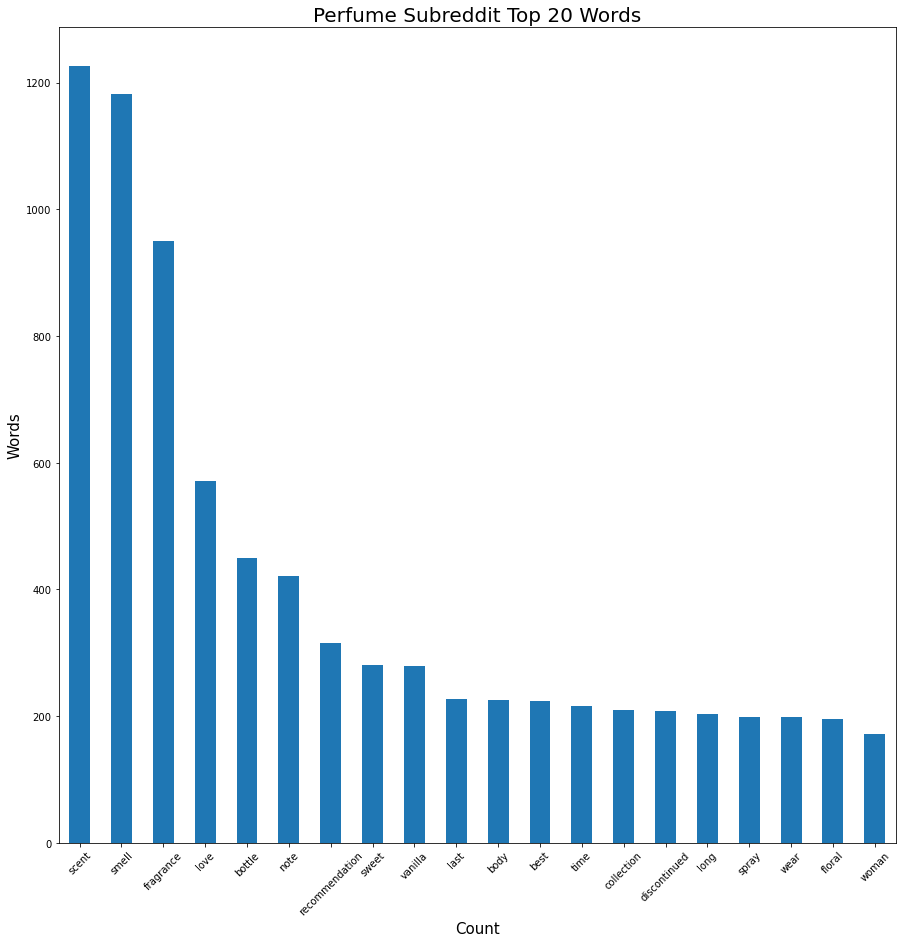

In [25]:
# Convert the top word count to a dataframe
top_words_perfume = top_words(perfumes_sparse_matrix, 20).to_frame()

# Plot the top 20 words in a bar chart
perfume_bar = top_words_perfume.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
perfume_bar.set_title('Perfume Subreddit Top 20 Words', fontsize=20)
perfume_bar.get_legend().remove()
perfume_bar.set_ylabel('Words', fontsize=15)
perfume_bar.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

In [26]:
# Lemmatize the 'title and selftext' column in the perfumes_df_cleaned dataset
perfumes_df_cleaned['title_and_selftext_lemmatized'] = perfumes_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

# Concatenate all the words in the 'title_and_selftext_lemmatized' column to string
perfumes_df_cleaned['title_and_selftext_string'] = perfumes_df_cleaned['title_and_selftext_lemmatized'].apply(
    lambda x: ' '.join(x))

# Create a mask for the word cloud
perfume_mask = np.array(Image.open('../image/Perfume.png'))

# Generate a word cloud
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, mask = perfume_mask)

wcloud = wc.generate(' '.join(perfumes_df_cleaned['title_and_selftext_string']))

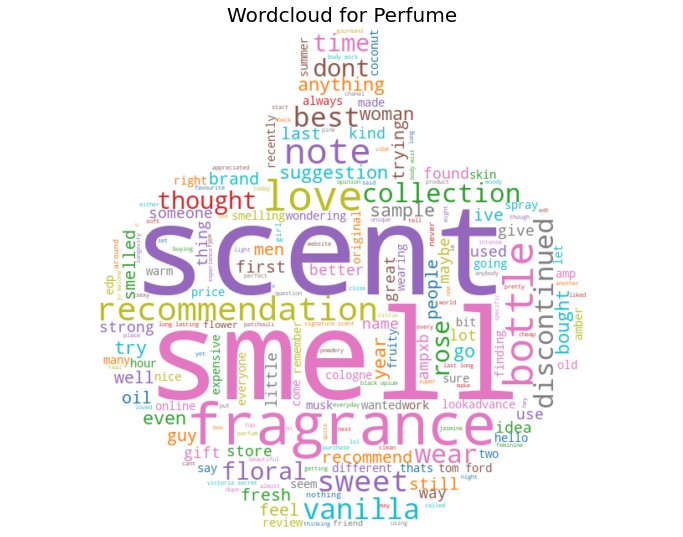

In [27]:
# Make figure to plot
plt.figure(figsize = (12,12))

# plot words
plt.imshow(wcloud, interpolation="bilinear")

# remove axes
plt.title("Wordcloud for Perfume", fontsize = 20)

# remove axes
plt.axis("off")

# save chart as png
plt.savefig('../image/perfume_wordcloud.png', transparent = True, bbox_inches = 'tight')

# show the result
plt.show()

After removing the new stop words, the revised top words seem to make more sense now. The top few words are 'scent' and 'smell', followed by 'fragrance'. Now we perform the same steps for the Makeup subreddit.

**1.4. Most Common Words in Makeup Subreddit**

In [28]:
# Find the top 50 words in makeup subreddit
print('Top 50 words in makeup subreddit')
print(top_words(makeup_sparse_matrix, 50).to_string())

Top 50 words in makeup subreddit
makeup            2289
look              1450
like              1317
foundation        1303
skin              1288
eye               1102
im                 997
use                951
product            935
make               811
know               766
get                763
would              746
help               742
one                729
really             727
good               718
shade              715
anyone             664
looking            650
want               640
face               623
palette            596
lip                574
mascara            561
eyeshadow          555
concealer          551
lash               540
eyeliner           531
wear               512
also               511
need               508
powder             507
color              503
ive                474
tried              460
dont               451
primer             448
find               441
amp                437
recommendation     434
lipstick           420
l

Similarly,'makeup' is the word that is most mentioned in the posts found in the 'Makeup' subreddit. Since, it is also directly related to the topic that we are looking at, we will remove this word. We will also remove further stopwords like 'get', 'would', 'make', etc that doesn't make sense. 

From the top 50 words, we will try to identify and remove as many stop words as possible. After that, we will look at the revised top 20 words to make sure that all of the stopwords have been removed from the list.

**1.5. Remove Further Stopwords from the Makeup Subreddit**

In [29]:
# List the words that we want to remove
stopwords_makeup = ['makeup', 'like', 'im', 'use', 'make', 'know', 'get', 'would', 'help', 'one', 'really',
                    'good', 'anyone', 'looking', 'want', 'also', 'ive', 'need', 'dont', 'find', 'recommendation',
                    'hi', 'everyone', 'thanks', 'first', 'ago']

# Remove stopwords from the 'title and selftext' column
makeup_df_cleaned['title_and_selftext_no_stop'] = makeup_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: remove_stopwords(x, stopwords_makeup))

# Recreate the sparse matrix for Makeup subreddit
makeup_sparse_matrix = sparsematrix_check(makeup_df_cleaned['title_and_selftext_no_stop'])

# Display the new top 20 words after the change
print('Top 20 words in Makeup subreddit (Revised):')
print("")
print(top_words(makeup_sparse_matrix, 20).to_string())

Top 20 words in Makeup subreddit (Revised):

look          1450
foundation    1303
skin          1288
eye           1102
product        935
shade          715
face           623
palette        596
lip            574
mascara        561
eyeshadow      555
concealer      551
lash           540
eyeliner       531
wear           512
powder         507
color          503
tried          460
primer         448
amp            437


**1.6. Visualise our findings for Makeup Subreddit**

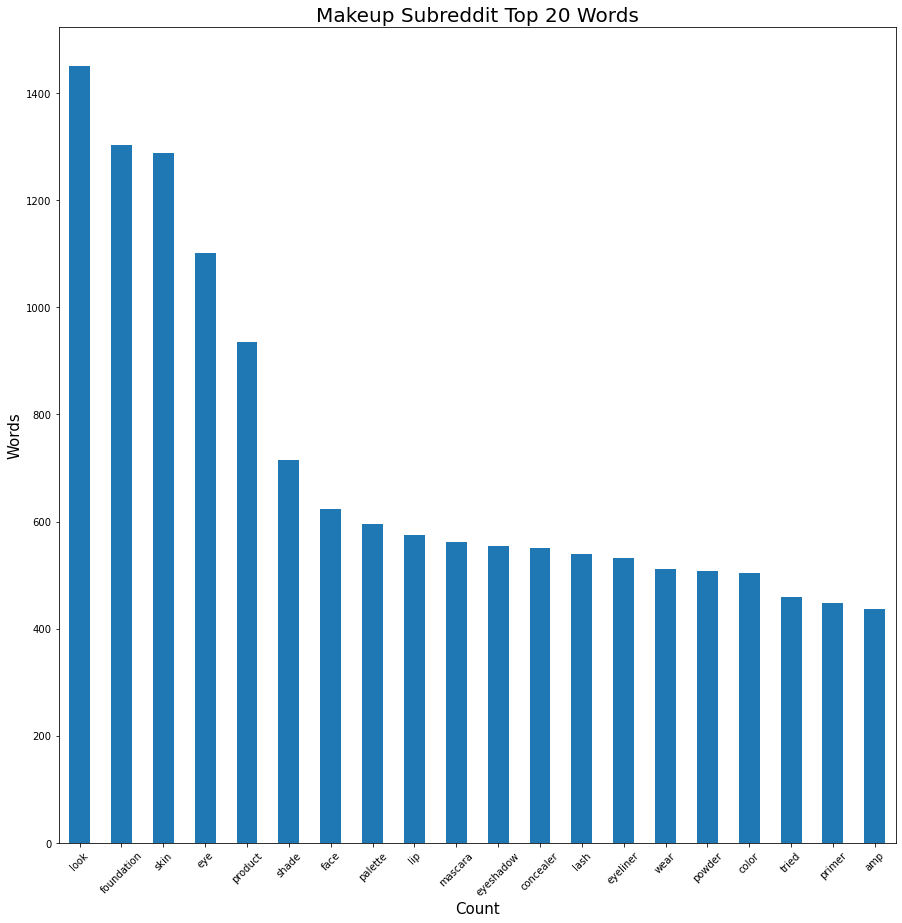

In [30]:
# Convert the top word count to a dataframe
top_words_makeup = top_words(makeup_sparse_matrix, 20).to_frame()

# Plot the top 20 words in a bar chart
makeup_bar = top_words_makeup.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
makeup_bar.set_title('Makeup Subreddit Top 20 Words', fontsize=20)
makeup_bar.get_legend().remove()
makeup_bar.set_ylabel('Words', fontsize=15)
makeup_bar.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

In [31]:
# Lemmatize the 'title and selftext' column in the makeup_df_cleaned dataset
makeup_df_cleaned['title_and_selftext_lemmatized'] = makeup_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

# Concatenate all the words in the 'title_and_selftext_lemmatized' column to string
makeup_df_cleaned['title_and_selftext_string'] = makeup_df_cleaned['title_and_selftext_lemmatized'].apply(lambda x: ' '.join(x))

# Create a mask for the word cloud
makeup_mask = np.array(Image.open('../image/Lipstick.png'))

# Generate a word cloud
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, mask = makeup_mask)

wcloud = wc.generate(' '.join(makeup_df_cleaned['title_and_selftext_string']))

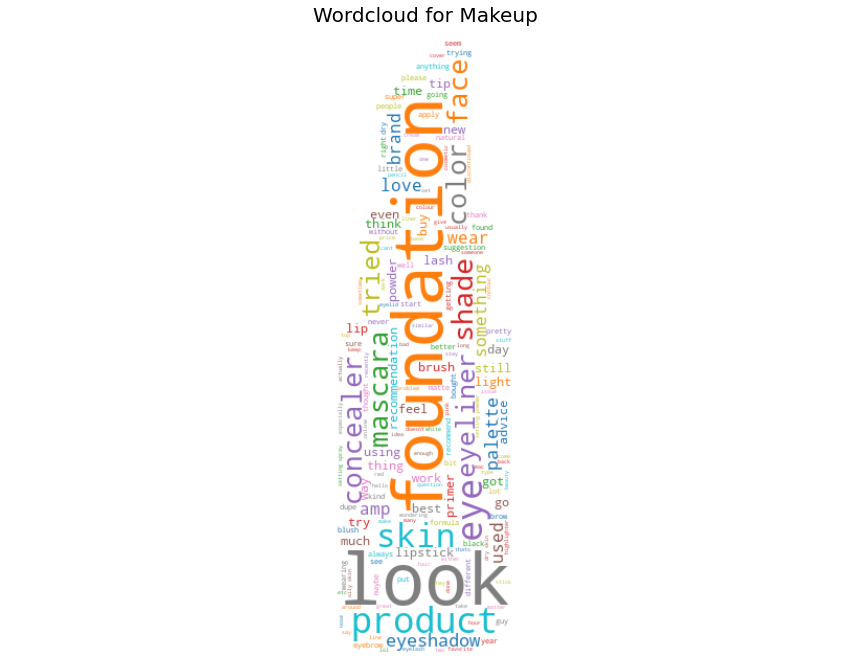

In [32]:
# Make figure to plot
plt.figure(figsize = (15,15))

# plot words
plt.imshow(wcloud, interpolation="bilinear")

# remove axes
plt.title("Wordcloud for Makeup", fontsize = 20)

# remove axes
plt.axis("off")

# save chart as png
plt.savefig('../image/makeup_wordcloud.png', transparent = True, bbox_inches = 'tight')

# show the result
plt.show()

After removing the new stop words, the revised top words make more sense now.. The top few words are 'look' and 'foundation', followed by 'skin'. Now that we have identified the top words, lets look at the top 2 words and 3 words phrases found for each subreddit.

**2.1. Count Vectorizer (N-Grams for Perfumes Subreddit)**

In [33]:
# Define function for N-Gram lemmatization
def lemmatizing_ngram(tokenized_text):
    # return string of all lemmatized words for their corresponding words in tokenized_text
    text = " ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

# Lemmatize the 'title and selftext' column
perfumes_df_cleaned['title_and_selftext_lemmatized'] = perfumes_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing_ngram(x))

# Define function to create sparsematrix for N-Gram
def sparsematrix_ngram_check(value, num):
    # Create a ngram
    ngram_vect = CountVectorizer(ngram_range=(num,num))

    # X_counts stores the vectorized version of the data
    X_counts = ngram_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Apply column name to the dataframe
    X_counts_df.columns = ngram_vect.get_feature_names()
    
    return X_counts_df

# Save bigram sparse matrix as combined_df_ngram
perfumes_df_cleaned_bigram = sparsematrix_ngram_check(perfumes_df_cleaned['title_and_selftext_lemmatized'], 2)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {perfumes_df_cleaned_bigram.shape}')

Total number of rows and columns:
(Rows, Columns): (3002, 44928)


There are a total of 44,928 unqiue 2 word phrases in the Perfume subreddit. Let's look at the top 20 phrases.

**Bigram - Perfume**

In [34]:
# Print top 20 BiGram words for Perfume subreddit
print('Top 20 BiGram words for Perfume subreddit')
print(top_words(perfumes_df_cleaned_bigram,20).to_string())

Top 20 BiGram words for Perfume subreddit
tom ford           80
signature scent    67
victoria secret    62
long lasting       62
black opium        55
body work          54
last long          53
body mist          46
jo malone          45
bath body          45
eau parfum         41
marc jacob         39
body spray         38
love smell         37
top note           36
spray ml           35
base note          35
light blue         33
dior sauvage       33
love scent         32


The phrases here seem to make more sense than the individual words. Words like 'tom ford', 'victora secret', 'marc jacob' are well known perfume brand names. Words like 'top note' refers to the scents you detect first after spraying a perfume, so it is a phrase that we expect to see in the dicussion posts as well. Also, it would seem like most of the words here pertains to perfume brands.

Now, lets take a look at the 3 word phrases.

**Trigram - Perfume**

In [35]:
# Save bigram sparse matrix as combined_df_ngram
perfumes_df_cleaned_trigram = sparsematrix_ngram_check(perfumes_df_cleaned['title_and_selftext_lemmatized'], 3)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {perfumes_df_cleaned_trigram.shape}')

Total number of rows and columns:
(Rows, Columns): (3002, 51855)


There are a total of 51,855 unqiue 3 word phrases in the Perfume subreddit. Let's look at the top 20 phrases.

In [36]:
# Print top 20 TriGram words for Perfume subreddit
print('Top 20 TriGram words for Perfume subreddit')
print(top_words(perfumes_df_cleaned_trigram,20).to_string())

Top 20 TriGram words for Perfume subreddit
bath body work            43
spray ml oz               18
ml oz vintage             17
vie est belle             16
dampg light blue          16
edt spray ml              15
la vie est                15
ysl black opium           14
acqua di gio              14
marc jacob daisy          14
viva la juicy             14
edp spray ml              13
ariana grande cloud       12
jean paul gaultier        12
versace dylan blue        11
bath amp body             11
amp body work             11
le feu dissey             11
feu dissey light          10
versace bright crystal    10


For the TriGram, the phrases made sense too. Over here, we get more brands/shop name of perfumes together with their description. Some examples are "bath body work", "vie est belle", "viva la juicy" and "ysl black opium". Similarly, most of the words her pertains to perfume brand names.

**2.2. Visualise our findings for Perfume Subreddit**

Now, let's visualise our findings from the Perfume subreddit.

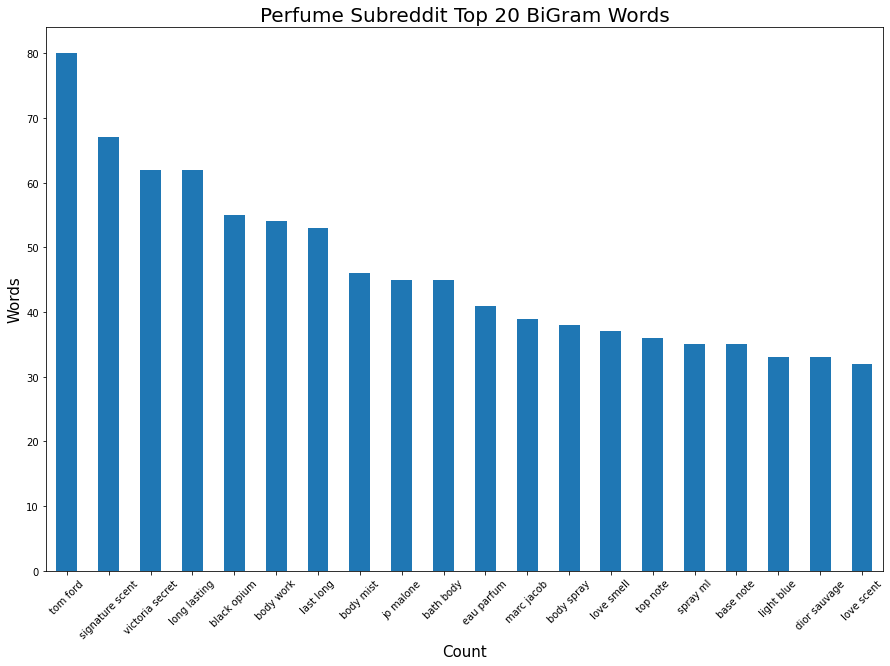

In [37]:
# Plot BiGram barchart

# Convert the top word count to a dataframe
top_words_perfume_bigram = top_words(perfumes_df_cleaned_bigram, 20).to_frame()

# Plot the top 20 words in a bar chart
perfume_bar_bigram = top_words_perfume_bigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
perfume_bar_bigram.set_title('Perfume Subreddit Top 20 BiGram Words', fontsize=20)
perfume_bar_bigram.get_legend().remove()
perfume_bar_bigram.set_ylabel('Words', fontsize=15)
perfume_bar_bigram.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

From the chart above, we can see that "Tom Ford" is has the highest frequency of 80 counts whereas the counts for the rest of words are relatively similar.

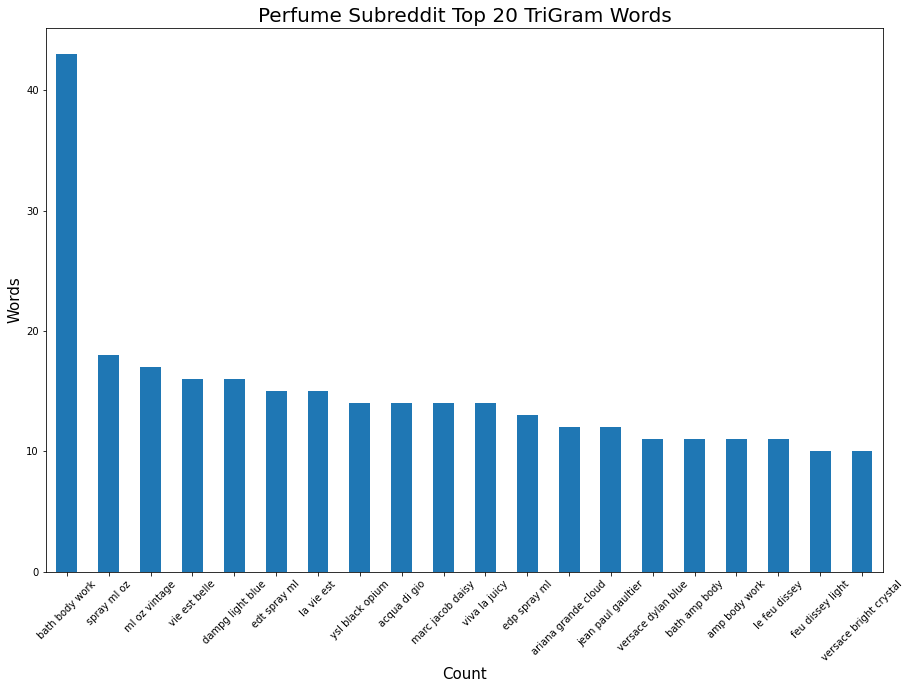

In [38]:
# Plot TriGram barchart

# Convert the top word count to a dataframe
top_words_perfume_trigram = top_words(perfumes_df_cleaned_trigram, 20).to_frame()

# Plot the top 20 words in a bar chart
perfume_bar_trigram = top_words_perfume_trigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
perfume_bar_trigram.set_title('Perfume Subreddit Top 20 TriGram Words', fontsize=20)
perfume_bar_trigram.get_legend().remove()
perfume_bar_trigram.set_ylabel('Words', fontsize=15)
perfume_bar_trigram.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

From the chart above, "bath body work" is the most mentioned place. The count for bath and body work is more than double the counts of other 3 word phrases. This is because Bath and Body Works is a well known shop that sells a wide range of perfumes and fragrances at an affordable price. It could be one of the most recommended shops for perfumes on the subreddit.

Now that we have analysed the BiGrams and TriGrams for Perfume, let's look at the phrases for the Makeup subreddit.

**2.3. Count Vectorizer (N-Grams for Makeup Subreddit)**

**Bigram - Makeup**

In [39]:
# Lemmatize the 'title and selftext' column
makeup_df_cleaned['title_and_selftext_lemmatized'] = makeup_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing_ngram(x))

# Save bigram sparse matrix as combined_df_ngram
makeup_df_cleaned_bigram = sparsematrix_ngram_check(makeup_df_cleaned['title_and_selftext_lemmatized'], 2)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {makeup_df_cleaned_bigram.shape}')

Total number of rows and columns:
(Rows, Columns): (3220, 76941)


There are a total of 76,904 unqiue 2 word phrases in the Makeup subreddit. Let's look at the top 20 phrases.

In [40]:
# Print top 20 BiGram words for Makeup subreddit
print('Top 20 BiGram words for Makeup subreddit')
print(top_words(makeup_df_cleaned_bigram,20).to_string())

Top 20 BiGram words for Makeup subreddit
setting spray           121
setting powder          107
dry skin                100
oily skin                93
eyeshadow palette        90
lip liner                86
skin tone                85
full coverage            68
lip gloss                64
tinted moisturizer       59
eye look                 57
urban decay              56
bb cream                 54
dark circle              52
charlotte tilbury        52
cc cream                 48
skin care                42
sensitive skin           42
rare beauty              42
foundation concealer     42


The phrases here seem to make sense too. Words like 'setting spray', 'setting powder', 'eyeshadow palette', 'lip gloss' and 'tinted moisturizer' are common makeup products that are used. Words like 'dry skin', 'oily skin', 'skin tone'and 'sensitive skin' decribes the condition of the skin before or after makeup is applied. As opposed to the Perfume subreddit, most of the words here pertains to makeup products instead of brand names. It could be because there are a lot of makeup products out there and that there isn't a specific brand that is popular for all sorts of makeup products.

Now, lets take a look at the 3 word phrases.

**Trigram - Makeup**

In [41]:
# Save bigram sparse matrix as combined_df_ngram
makeup_df_cleaned_trigram = sparsematrix_ngram_check(makeup_df_cleaned['title_and_selftext_lemmatized'], 3)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {makeup_df_cleaned_trigram.shape}')

Total number of rows and columns:
(Rows, Columns): (3220, 96267)


There are a total of 95,689 unqiue 3 word phrases in the Makeup subreddit. Let's look at the top 20 phrases.

In [42]:
# Print top 20 TriGram words for Makeup subreddit
print('Top 20 TriGram words for Makeup subreddit')
print(top_words(makeup_df_cleaned_trigram,20).to_string())

Top 20 TriGram words for Makeup subreddit
lauder double wear              24
happy none stuff                23
none stuff sponsored            23
stuff sponsored fun             22
available profile interested    22
picture available profile       21
full coverage foundation        17
acne prone skin                 16
product didnt work              14
skin care product               13
review amp pictorial            13
wowd best personal              13
rating legend totally           13
didnt work totally              13
wrong product didnt             13
bias nothing wrong              13
personal bias nothing           13
best personal bias              13
product happy none              13
palette review amp              13


The Trigram for the Makeup subreddit seems to make less sense as phrases suchs as 'happy none stuff' and 'none stuff sponsored" is in the top 20 list. Despite that, there are phrases that is able to provide useful insights such as 'lauder double wear', 'full coverage foundation' etc. These phrases descibe some of the products available in makeup. There are also feedbacks from users such as 'product didnt work' and 'didnt work totally' that describes whether the products were effective or not.

**2.4. Visualise our findings for Makeup Subreddit**

Now, let's visualise our findings from the Makeup subreddit.

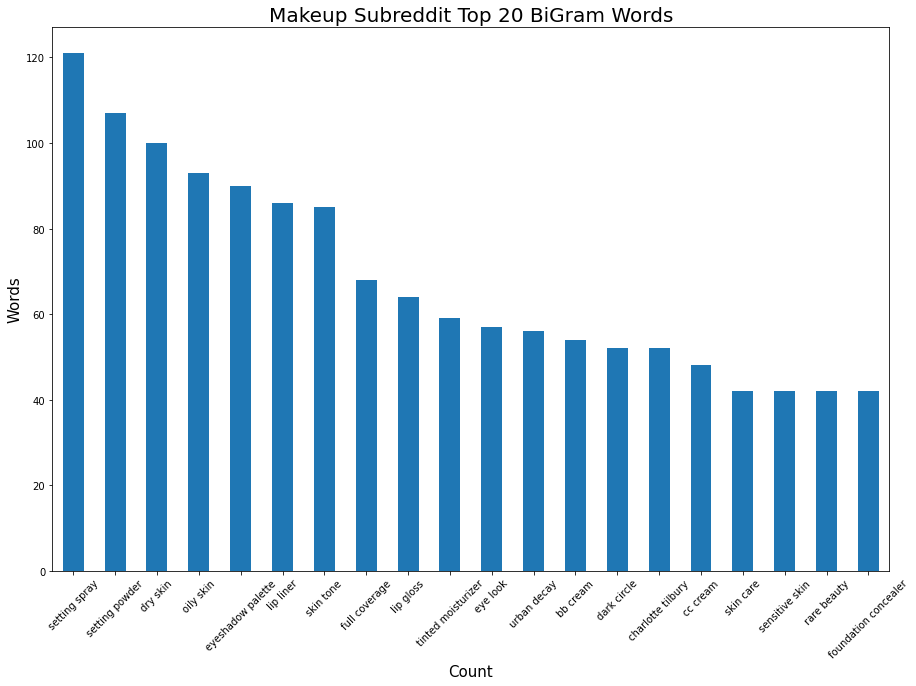

In [43]:
# Plot BiGram barchart

# Convert the top word count to a dataframe
top_words_makeup_bigram = top_words(makeup_df_cleaned_bigram, 20).to_frame()

# Plot the top 20 words in a bar chart
makeup_bar_bigram = top_words_makeup_bigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
makeup_bar_bigram.set_title('Makeup Subreddit Top 20 BiGram Words', fontsize=20)
makeup_bar_bigram.get_legend().remove()
makeup_bar_bigram.set_ylabel('Words', fontsize=15)
makeup_bar_bigram.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

Based on the chart above, "setting spray' is the most mentioned phrase followed by 'setting powder' and dry skin. The counts here seems more evenly distributed as compared to the Perfume subreddit's Bigram. 

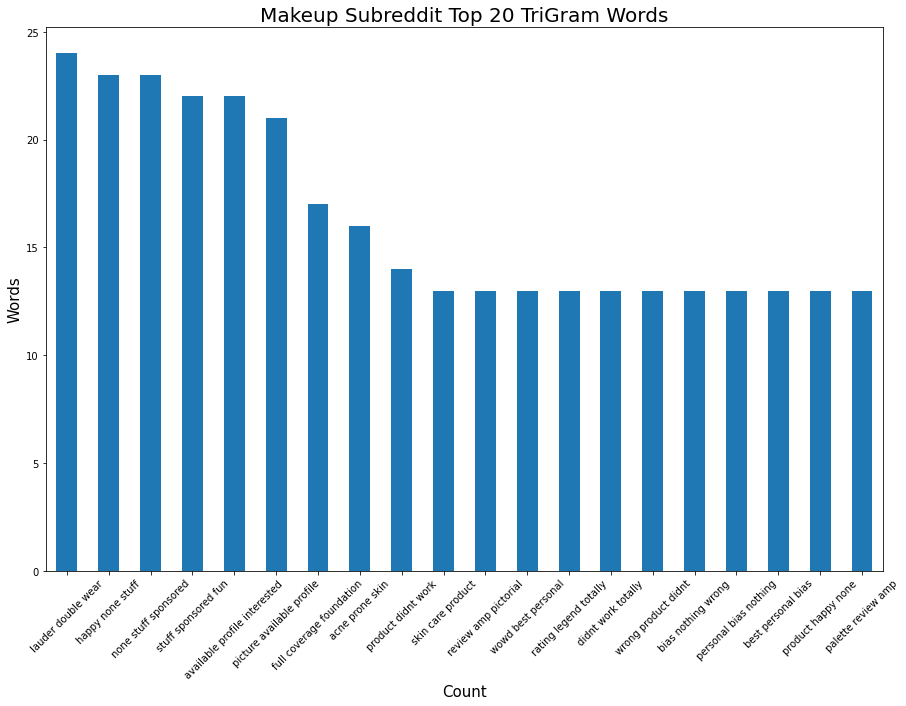

In [44]:
# Plot TriGram barchart

# Convert the top word count to a dataframe
top_words_makeup_trigram = top_words(makeup_df_cleaned_trigram, 20).to_frame()

# Plot the top 20 words in a bar chart
makeup_bar_trigram = top_words_makeup_trigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5)

# Set the title, x & y labels and remove legend
makeup_bar_trigram.set_title('Makeup Subreddit Top 20 TriGram Words', fontsize=20)
makeup_bar_trigram.get_legend().remove()
makeup_bar_trigram.set_ylabel('Words', fontsize=15)
makeup_bar_trigram.set_xlabel('Count', fontsize=15)
plt.xticks(rotation=45);

The most mentioned 3 word phrases in the makeup subreddit is 'lauder double wear' and 'happy none stuff'. Some of the most mentioned here doesn't provide much insight on the common discussions found in the Makeup subreddit, but there are a few that can still provide valuable insights. Also, the phrase counts here are also more evenly distributed as compared to the TriGram for the Perfume subreddit.

## Modelling

Now, let's prepare our models with the data that we have. The models we will be looking at are as follow:
- Count Vectorizer - Naive Bayes Bernouli
- Count Vectorizer - Naive Bayes Multinomial
- Count Vectorizer - Logistic Regression
- BiGram - Naive Bayes Bernouli
- BiGram - Naive Bayes Multinomial
- BiGram - Logistic Regression
- TF-IDF - Naive Bayes Bernouli
- TF-IDF - Naive Bayes Multinomial
- TF-IDF - Logistic Regression

The first portion found in the name is the count vectorisation method followed by the model being used. For example "Count Vectorizer - Naive Bayes Bernouli" means that this is a Naive Bayes Bernouli model that is built using data that has been count vectorised by using the Count Vectorizer method.

**1. Merge the `makeup_df_cleaned` and `perfumes_df_cleaned` dataset**

Now that we have included additional stopwords for both the Perfume and Makeup dataset, we will combine them so that we can use the combined dataset for modelling.

In [45]:
# Merge the 'makeup_df_cleaned' and 'perfume_df_cleaned' dataset
combined_df_cleaned = pd.concat([makeup_df_cleaned, perfumes_df_cleaned])

# Check the number of rows and columns in the new dataset
print("\"Combined_Cleaned\" dataset:")
print(f"(Rows, Column): {combined_df_cleaned.shape}")

"Combined_Cleaned" dataset:
(Rows, Column): (6222, 10)


The total nummber of rows is 6,222, which ties back to the `combined_df`. This means that there is no loss of data from either datasets.

In [46]:
# Display the top few rows of the merged dataset.
display(combined_df_cleaned.head())

,subreddit,title,selftext,title_and_selftext,label,title_and_selftext_clean,title_and_selftext_tokenized,title_and_selftext_no_stop,title_and_selftext_lemmatized,title_and_selftext_string
3002,Makeup,Eyeshadow Fallout,1. Do any of you experience eyeshadow fallout?...,Eyeshadow Fallout 1. Do any of you experience ...,1,Eyeshadow Fallout 1 Do any of you experience e...,"[eyeshadow, fallout, 1, do, any, of, you, expe...","[eyeshadow, fallout, experience, eyeshadow, fa...",eyeshadow fallout experience eyeshadow fallout...,eyeshadow fallout experience eyeshadow fallout...
3003,Makeup,I have got some education on crypto I’ll like ...,,I have got some education on crypto I’ll like ...,1,I have got some education on crypto I’ll like ...,"[i, have, got, some, education, on, crypto, i,...","[got, education, crypto, share]",got education crypto share,got education crypto share
3004,Makeup,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,Does anyone know a lip liner similar to this c...,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,1,Is Rimmel 1000 Kisses Coffee Bean lip liner di...,"[is, rimmel, 1000, kisses, coffee, bean, lip, ...","[rimmel, kisses, coffee, bean, lip, liner, dis...",rimmel kiss coffee bean lip liner discontinued...,rimmel kiss coffee bean lip liner discontinued...
3005,Makeup,Eyeshadow Fallout Question,My apologies - my last post wasn't very clear ...,Eyeshadow Fallout Question My apologies - my l...,1,Eyeshadow Fallout Question My apologies my la...,"[eyeshadow, fallout, question, my, apologies, ...","[eyeshadow, fallout, question, apologies, last...",eyeshadow fallout question apology last post w...,eyeshadow fallout question apology last post w...
3006,Makeup,Make up to cover a tattoo in an extreme climate,"Hi, I’m a guy that’s never wore make up before...",Make up to cover a tattoo in an extreme climat...,1,Make up to cover a tattoo in an extreme climat...,"[make, up, to, cover, a, tattoo, in, an, extre...","[cover, tattoo, extreme, climate, guy, never, ...",cover tattoo extreme climate guy never wore pr...,cover tattoo extreme climate guy never wore pr...


**2. Count Vectorizer - Naive Bayes Bernouli**

**2.1. Check that the target variable is binary.**

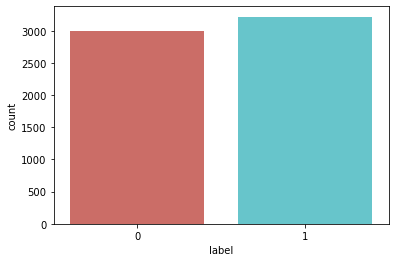

In [47]:
# Check that there are only 2 classes of values for target variable
label_cat = sns.countplot(x='label', data=combined_df_cleaned, palette='hls');

There are only 2 classes of value in the `label` column. 0 stands for 'Perfumes' and 1 stands for 'Makeup'.

**2.2. Convert `combined_df_cleaned` into a Count Vectorizer Sparse Matrix**

In [48]:
# Convert the 'combined_df_cleaned' dataset into a sparsematrix
combined_df_cleaned_cv_sparsematrix = sparsematrix_check(
    combined_df_cleaned['title_and_selftext_no_stop'])

# Adding the label column to the sparsematrix
combined_df_cleaned_cv_sparsematrix['category_label'] = combined_df_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_df_cleaned_cv_sparsematrix.shape}")

Number of rows and columns:
(Rows, columns): (6222, 14817)


**2.3. Training and Testing the Model**

In [49]:
# Define X and y
X = combined_df_cleaned_cv_sparsematrix.iloc[:, 0:14816] # Rest of the column except the "category_label" column
y = combined_df_cleaned_cv_sparsematrix.iloc[:, -1] # Location of the "category_label" column 

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
cv_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
cv_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"Count Vectorizer - Naive Bayes Bernouli\" model:")
print(f"Count Vectorizer - Naive Bayes Bernouli Train Score: {round(cv_nb_bernouli_train_score,4)}")
print(f"Count Vectorizer - Naive Bayes Bernouli Test Score: {round(cv_nb_bernouli_test_score,4)}")

Accuracy Scores for the "Count Vectorizer - Naive Bayes Bernouli" model:
Count Vectorizer - Naive Bayes Bernouli Train Score: 0.7932
Count Vectorizer - Naive Bayes Bernouli Test Score: 0.7686


In [51]:
# Display Classification Metrics
print("Count Vectorizer - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

Count Vectorizer - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.72       775
           1       0.70      0.95      0.81       781

    accuracy                           0.77      1556
   macro avg       0.81      0.77      0.76      1556
weighted avg       0.81      0.77      0.76      1556



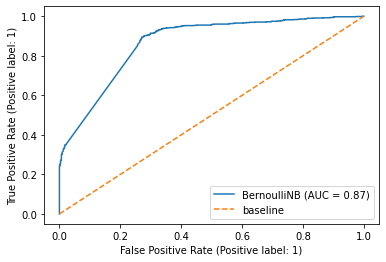

In [52]:
# Plotting of the ROC curve
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The "Count Vectorizer - Naive Bayes Bernouli" has returned a pretty decent model accuracy results of 0.7932 for train and 0.7686 for test. Let's see if there are other models with better accuracy results.

**3. Count Vectorizer - Naive Bayes Multinomial**

**3.1. Training and Testing the Model**

In [53]:
# Training the Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Saving the train and test scores
cv_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
cv_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"Count Vectorizer - Naive Bayes Multinomial\" model:")
print(f"Count Vectorizer - Naive Bayes Multinomial Train Score: {round(cv_nb_multinomial_train_score,4)}")
print(f"Count Vectorizer - Naive Bayes Multinomial Test Score: {round(cv_nb_multinomial_test_score,4)}")

Accuracy Scores for the "Count Vectorizer - Naive Bayes Multinomial" model:
Count Vectorizer - Naive Bayes Multinomial Train Score: 0.9477
Count Vectorizer - Naive Bayes Multinomial Test Score: 0.9132


In [54]:
# Display Classification Metrics
print("Count Vectorizer - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

Count Vectorizer - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       775
           1       0.94      0.89      0.91       781

    accuracy                           0.91      1556
   macro avg       0.91      0.91      0.91      1556
weighted avg       0.91      0.91      0.91      1556



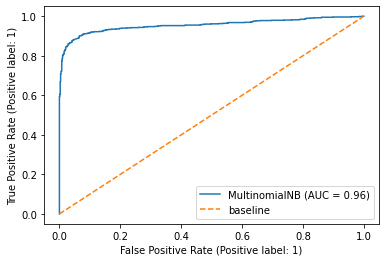

In [55]:
# Plotting of the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The Count Vectorizer - Naive Bayes Bernouli returns rather accurate scores of 0.9477 for the test data and 0.9132 for the train data. This is the best performing model for now.

**4. Count Vectorizer - Logistic Regression**

**4.1. Training and Testing the Model**

In [56]:
# Training the Multinomial Model
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
cv_logistic_train_score = accuracy_score(y_train, y_pred_train)
cv_logistic_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"Count Vectorizer - Logistic Regression\" model:")
print(f"Count Vectorizer - Logistic Regression Train Score: {round(cv_logistic_train_score,4)}")
print(f"Count Vectorizer - Logistic Regression Test Score: {round(cv_logistic_test_score,4)}")

Accuracy Scores for the "Count Vectorizer - Logistic Regression" model:
Count Vectorizer - Logistic Regression Train Score: 0.982
Count Vectorizer - Logistic Regression Test Score: 0.8798


In [57]:
# Display Classification Metrics
print("Count Vectorizer - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

Count Vectorizer - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       775
           1       0.87      0.89      0.88       781

    accuracy                           0.88      1556
   macro avg       0.88      0.88      0.88      1556
weighted avg       0.88      0.88      0.88      1556



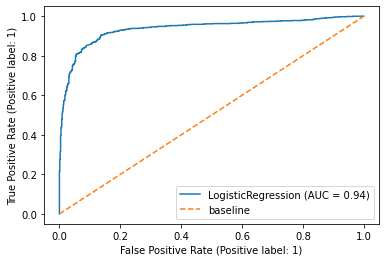

In [58]:
# Plotting of the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

It seems like there is some overfitting when the "Count Vectorizer - Logistic Regression" model is used as the train score differs from the test score by more than 0.1. We will keep that in mind when comparing our results.

**5. Count Vectorizer (BiGram) - Naive Bayes Bernouli**

**5.1. Convert `combined_df_cleaned` into a Count Vectorizer BiGram Sparse Matrix**

In [59]:
# Lemmatize the 'title and selftext' column for the 'combined_df_cleaned' dataset
combined_df_cleaned['title_and_selftext_lemmatized'] = combined_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing_ngram(x))

# Save bigram sparse matrix as combined_df_ngram
combined_df_cleaned_bigram_sparesematrix = sparsematrix_ngram_check(
    combined_df_cleaned['title_and_selftext_lemmatized'], 2)

# Adding the label column to the sparsematrix
combined_df_cleaned_bigram_sparesematrix['category_label'] = combined_df_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_df_cleaned_bigram_sparesematrix.shape}")

Number of rows and columns:
(Rows, columns): (6222, 118997)


**5.2. Training and Testing the Model**

In [60]:
# Define X and y
X = combined_df_cleaned_bigram_sparesematrix.iloc[:, 0:118996] # Rest of the column except the "category_label" column
y = combined_df_cleaned_bigram_sparesematrix.iloc[:, -1] # Location of the "category_label" column 

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
bigram_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"BiGram - Naive Bayes Bernouli\" model:")
print(f"BiGram - Naive Bayes Bernouli Train Score: {round(bigram_nb_bernouli_train_score,4)}")
print(f"BiGram - Naive Bayes Bernouli Test Score: {round(bigram_nb_bernouli_test_score,4)}")

Accuracy Scores for the "BiGram - Naive Bayes Bernouli" model:
BiGram - Naive Bayes Bernouli Train Score: 0.5347
BiGram - Naive Bayes Bernouli Test Score: 0.5039


In [62]:
# Display Classification Metrics
print("BiGram - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.01      0.01       775
           1       0.50      1.00      0.67       781

    accuracy                           0.50      1556
   macro avg       0.65      0.50      0.34      1556
weighted avg       0.65      0.50      0.34      1556



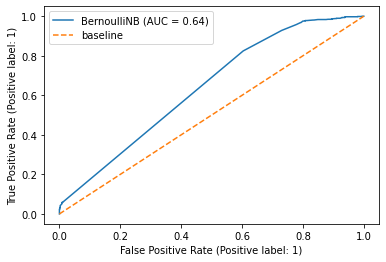

In [63]:
# Plotting of the ROC curve
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The "BiGram - Naive Bayes Bernouli" model returned a mediocre train accuracy of 0.5347 and a subpar test accuracy of 0.5039. This is the worst performing model so far. Let's try to raise the accuracy by tuning the model parameters using GridSearchCV.

In [64]:
# Set up Gridsearch with preferred n_neighbours range and preferred CV value
params = {"binarize":[0.1]} #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
model = GridSearchCV(BernoulliNB(), params, cv=5)

model.fit(X_train, y_train)
print("Best 'Binarize' value:")
print(model.best_params_)

Best 'Binarize' value:
{'binarize': 0.1}


We have tried running GridSearchCV using values from 0.1 to 1 and best value returned is 0.1. Let's try putting this value into the "binarize" parameter for the Bernoulli model.

In [65]:
# Training the Bernoulli Model with the best param
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
bigram_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"BiGram - Naive Bayes Bernouli\" model:")
print(f"BiGram - Naive Bayes Bernouli Train Score: {round(bigram_nb_bernouli_train_score,4)}")
print(f"BiGram - Naive Bayes Bernouli Test Score: {round(bigram_nb_bernouli_test_score,4)}")

Accuracy Scores for the "BiGram - Naive Bayes Bernouli" model:
BiGram - Naive Bayes Bernouli Train Score: 0.8043
BiGram - Naive Bayes Bernouli Test Score: 0.5996


In [66]:
# Display Classification Metrics
print("BiGram - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.21      0.34       775
           1       0.56      0.99      0.71       781

    accuracy                           0.60      1556
   macro avg       0.75      0.60      0.53      1556
weighted avg       0.75      0.60      0.53      1556



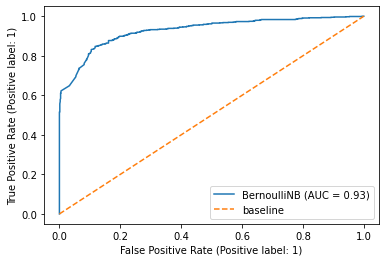

In [67]:
# Plotting of the ROC curve
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

After optimising the 'binarize' parameter, the train and test score for "BiGram - Naive Bayes Bernouli" has increased but it has also caused the model to be severly overfitted as the difference between the train score and test score is more than 0.1.

**6. Count Vectorizer (BiGram) - Naive Bayes Multinomial**

**6.1. Training and Testing the Model**

In [68]:
# Training the Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Saving the train and test scores
bigram_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"BiGram - Naive Bayes Multinomial\" model:")
print(f"BiGram - Naive Bayes Multinomial Train Score: {round(bigram_nb_multinomial_train_score,4)}")
print(f"BiGram - Naive Bayes Multinomial Test Score: {round(bigram_nb_multinomial_test_score,4)}")

Accuracy Scores for the "BiGram - Naive Bayes Multinomial" model:
BiGram - Naive Bayes Multinomial Train Score: 0.9859
BiGram - Naive Bayes Multinomial Test Score: 0.829


In [69]:
# Display Classification Metrics
print("BiGram - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       775
           1       0.78      0.91      0.84       781

    accuracy                           0.83      1556
   macro avg       0.84      0.83      0.83      1556
weighted avg       0.84      0.83      0.83      1556



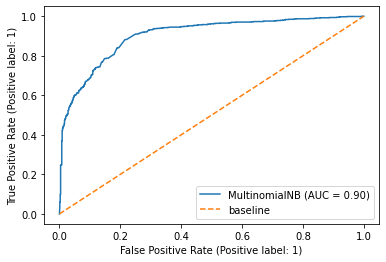

In [70]:
# Plotting of the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

It seems like there is also some overfitting in the "BiGram - Naive Bayes Multinomial" model as the train score differs from the test score by more than 0.1. We will take this into consideration when selecting the best performing model.

**7. BiGram - Logistic Regression**

**7.1. Training and Testing the Model**

In [71]:
# Training the Multinomial Model
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
bigram_nb_logistic_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_logistic_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"BiGram - Logistic Regression\" model:")
print(f"BiGram - Logistic Regression Train Score: {round(bigram_nb_logistic_train_score,4)}")
print(f"BiGram - Logistic Regression Test Score: {round(bigram_nb_logistic_test_score,4)}")

Accuracy Scores for the "BiGram - Logistic Regression" model:
BiGram - Logistic Regression Train Score: 0.9799
BiGram - Logistic Regression Test Score: 0.7712


In [72]:
# Display Classification Metrics
print("BiGram - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72       775
           1       0.70      0.95      0.81       781

    accuracy                           0.77      1556
   macro avg       0.81      0.77      0.76      1556
weighted avg       0.81      0.77      0.76      1556



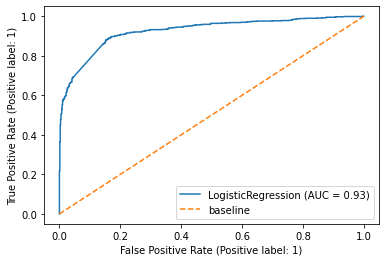

In [73]:
# Plotting of the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

It seems like there is some overfitting when the "BiGram - Logistic Regression" model is used as the train score differs from the test score by more than 0.1. We will keep that in mind when comparing our results.

In general, it seems the model produces the worst results when BiGram is used as the vectorization method. The Naive Bayes Bernouli model is the worst performing model out of all the models so far whereas the Naive Bayes Multinomial model and Logistic Regression models are overfitted.

**8. (TF-IDF) - Naive Bayes Bernouli**

**8.1. Convert combined_df_cleaned into a Count Vectorizer TF-IDF Sparse Matrix**

In [74]:
# Define function to create sparse matrix for TF-IDF
def sparsematrix_tiidf_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    tfidf_vect = TfidfVectorizer(analyzer = lemmatizing)

    # X_counts stores the vectorized version of the data
    X_tfidf = tfidf_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    
    # Apply column name to the dataframe
    X_tfidf_df.columns = tfidf_vect.get_feature_names()
    
    return X_tfidf_df

# Create TF-IDF for Perfume subreddit
combined_df_cleaned_tfidf_sparsematrix = sparsematrix_tiidf_check(combined_df_cleaned['title_and_selftext_no_stop'])

# Adding the label column to the sparsematrix
combined_df_cleaned_tfidf_sparsematrix['category_label'] = combined_df_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_df_cleaned_tfidf_sparsematrix.shape}")

Number of rows and columns:
(Rows, columns): (6222, 14817)


**8.2. Training and Testing the Model**

In [75]:
# Define X and y
X = combined_df_cleaned_tfidf_sparsematrix.iloc[:, 0:14816] # Rest of the column except the "category_label" column
y = combined_df_cleaned_tfidf_sparsematrix.iloc[:, -1] # Location of the "category_label" column 

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [76]:
# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
TFIDF_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"TF-IDF - Naive Bayes Bernouli\" model:")
print(f"TF-IDF - Naive Bayes Bernouli Train Score: {round(TFIDF_nb_bernouli_train_score,4)}")
print(f"TF-IDF - Naive Bayes Bernouli Test Score: {round(TFIDF_nb_bernouli_test_score,4)}")

Accuracy Scores for the "TF-IDF - Naive Bayes Bernouli" model:
TF-IDF - Naive Bayes Bernouli Train Score: 0.5227
TF-IDF - Naive Bayes Bernouli Test Score: 0.5019


In [77]:
# Display Classification Metrics
print("(TF-IDF) - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       775
           1       0.50      1.00      0.67       781

    accuracy                           0.50      1556
   macro avg       0.25      0.50      0.33      1556
weighted avg       0.25      0.50      0.34      1556



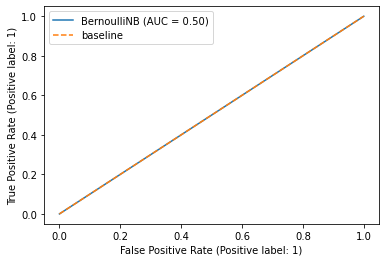

In [78]:
# Plotting of the ROC curve
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The "TF-IDF - Naive Bayes Bernouli" model has returned rather subpar scores of 0.5227 for train and 0.5019 for test. Let's try tuning the parameter with GridSearchCv.

In [79]:
# Set up Gridsearch with preferred n_neighbours range and preferred CV value
params = {"binarize":[0.2]} #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
model = GridSearchCV(BernoulliNB(), params, cv=5)

model.fit(X_train, y_train)
print("Best 'Binarize' value:")
print(model.best_params_)

Best 'Binarize' value:
{'binarize': 0.2}


We have tried running GridSearchCV using values from 0.1 to 1 and best value returned is 0.2. Let's try putting this value into the binarize parameter for the Bernoulli model.

In [80]:
# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=0.2)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
TFIDF_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"TF-IDF - Naive Bayes Bernouli\" model:")
print(f"TF-IDF - Naive Bayes Bernouli Train Score: {round(TFIDF_nb_bernouli_train_score,4)}")
print(f"TF-IDF - Naive Bayes Bernouli Test Score: {round(TFIDF_nb_bernouli_test_score,4)}")

Accuracy Scores for the "TF-IDF - Naive Bayes Bernouli" model:
TF-IDF - Naive Bayes Bernouli Train Score: 0.9464
TF-IDF - Naive Bayes Bernouli Test Score: 0.8805


In [81]:
# Display Classification Metrics
print("(TF-IDF) - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       775
           1       0.88      0.88      0.88       781

    accuracy                           0.88      1556
   macro avg       0.88      0.88      0.88      1556
weighted avg       0.88      0.88      0.88      1556



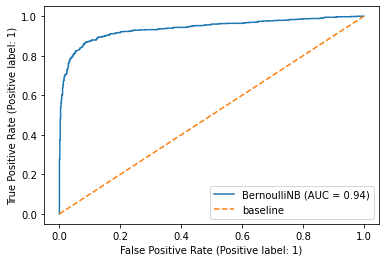

In [82]:
# Plotting of the ROC curve
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

By changing the "binarize" parameter to 0.2, the results have increased drastically from 0.5227 to 0.9464 for train and 0.5019 to 0.8805 for test.

**9. (TF-IDF) - Naive Bayes Multinomial**

**9.1. Training and Testing the Model**

In [83]:
# Training the Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Saving the train and test scores
TFIDF_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"TF-IDF - Naive Bayes Multinomial\" model:")
print(f"TF-IDF - Naive Bayes Multinomial Train Score: {round(TFIDF_nb_multinomial_train_score,4)}")
print(f"TF-IDF - Naive Bayes Multinomial Test Score: {round(TFIDF_nb_multinomial_test_score,4)}")

Accuracy Scores for the "TF-IDF - Naive Bayes Multinomial" model:
TF-IDF - Naive Bayes Multinomial Train Score: 0.9522
TF-IDF - Naive Bayes Multinomial Test Score: 0.9152


In [84]:
# Display Classification Metrics
print("(TF-IDF) - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       775
           1       0.95      0.88      0.91       781

    accuracy                           0.92      1556
   macro avg       0.92      0.92      0.92      1556
weighted avg       0.92      0.92      0.92      1556



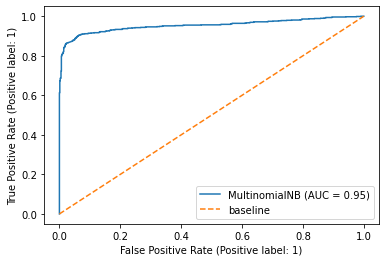

In [85]:
# Plotting of the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The "(TF-IDF) - Naive Bayes Multinomial" model is the best performing model so far with a train score of 0.9522 and a test score of 0.9152.

**10. (TF-IDF) - Logistic Regression**

**10.1. Training and Testing the Model**

In [86]:
# Training the Logistic Regression Model
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
TFIDF_logistic_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_logistic_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"TF-IDF - Logistic Regression\" model:")
print(f"TF-IDF - Logistic Regression Train Score: {round(TFIDF_logistic_train_score,4)}")
print(f"TF-IDF - Logistic Regression Test Score: {round(TFIDF_logistic_test_score,4)}")

Accuracy Scores for the "TF-IDF - Logistic Regression" model:
TF-IDF - Logistic Regression Train Score: 0.9535
TF-IDF - Logistic Regression Test Score: 0.9062


In [87]:
# Display Classification Metrics
print("(TF-IDF) - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       775
           1       0.90      0.92      0.91       781

    accuracy                           0.91      1556
   macro avg       0.91      0.91      0.91      1556
weighted avg       0.91      0.91      0.91      1556



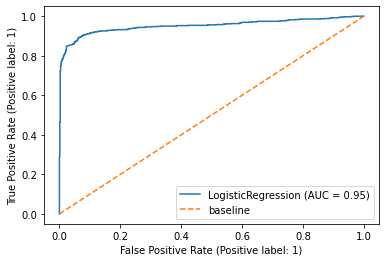

In [88]:
# Plotting of the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The (TF-IDF) - Logistic Regression has returned rather good results of 0.9535 for train and 0.9062 for test.

**Summary Train and Test Results**

Here is a summary of the three models we have ran, using three different Count Vectorization methods.

|Count Vectorization Method|Model|Train Results|Test Results
|:--|:--|:-:|:-:|
|Count Vectorizer|Naive Bayes Bernouli|0.7932|0.7686|
|Count Vectorizer|Naive Bayes Multinomial|0.9477|0.9132|
|Count Vectorizer|Logistic Regression|0.9820|0.8798|
|BiGram|Naive Bayes Bernouli|0.8043|0.5996|
|BiGram|Naive Bayes Multinomial|0.9859|0.8290|
|BiGram|Logistic Regression|0.9799|0.7712|
|TF-IDF|Naive Bayes Bernouli|0.9464|0.8805|
|**<font color = blue>TF-IDF</font>**|**<font color = blue>Naive Bayes Multinomial</font>**|**<font color = blue>0.9522</font>**|**<font color = blue>0.9152</font>**|
|TF-IDF|Logistic Regression|0.9535|0.9062|

The "(TF-IDF) - Naive Bayes Multinomial model is our best performing model. Let's try optimising the parameters of this model to see if we can improve the accuracy scoress further. We will run GridSearchCV on the "(TF-IDF) - Naive Bayes Multinomial" model to get the optiaml 'alpha' and 'fit_prior' parameters. We will test for 'alpha' values 0.1 to 1 and for 'fit_prior' values 'True' and 'False'.

In [89]:
# Set up Gridsearch with preferred n_neighbours range and preferred CV value
alphas = [1.0] #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
params = {'alpha': alphas, 'fit_prior' : [True, False]}
model = GridSearchCV(MultinomialNB(), params, cv=5)

model.fit(X_train, y_train)
print("Best 'Binarize' value:")
print(model.best_params_)

Best 'Binarize' value:
{'alpha': 1.0, 'fit_prior': True}


We have tried running GridSearchCV on the "Count Vectorizer (TF-IDF) - Naive Bayes Multinomial" model and the best value for 'alpha' is 1 and the best value for 'fit_prior' is true. This means that there is no change from what we have ran before as these values are the default parameter for the "MultinomialNB" function. This means that this model is already full optimised.



From the table above, we can see that the Bigram is the worst count vectorization method as the model accuracy results are the lowest among the three count vectorization methods. TF-IDF is the best count vectorization method as the models generated using TF-IDF has the highest accuracy among the three count vectorization method.

## Conclusions and Recommendations

### Key Takeaways:

1. The "(TF-IDF) - Naive Bayes Multinomial model is our best performing model with a train score of 0.9522 and a test score of 0.9152.
2. Perfume brands make up most of the top phrases in the Perfume subreddit whereas makeup products made up most of the top phrases in the makeup subreddit.
3. Some of the most mentioned perfume brands are Tom Ford, Victoria Secret and Black Opium. 
4. Some of the most mentioned makeup products are Setting Spray, Setting Powder and Eyeshadow Palette.
5. Features that consumers look out for in perfumes are whether the perfumes are long lasting and whether they are appealing to the opposite sex.
6. Features that consumers look out for in makeup are whether the makeup are suitable for their skin.

### Limitations and Future Enhancements

1. Words and phrases found and identified were restricted to what were discussed in the subreddit. There could be other topics that were discussed elsewhere. We would suggest scrapping other forums (for example, the forums or comments found on other sites) in addition to the reddit data that we have collected. This could give us a more complete picture on the topics that are most commonly discussed on the forums.
2. The topics discussed on the company's forums might be different from those in the subreddit. We would suggest repeating the analysis when the company website forums have garned enough posts.
3. Analysis is done based on 1 word, 2 words and 3 words phrases. The words do not give us insights on whether the discussions are positive or negative in nature. We would suggest conducting sentiment analysis on the data collected as well.

### Recommendations

Our recommendations are as per below:
1. We would recommend running marketing campaigns on the perfume brands such as Tom Ford, Victoria Secret and Black Opium as these are the most commonly discussed brands. We have taken a look at some of the posts that contain these phrases and it seems like these brands are often recommended by other consumers.
2. When running marketing campaigns for makeup, we would suggest focusing on makeup products instead of brands, because it seems like makeup is less brand sensitive as compared to perfume. We would suggest focusing on the products that are suitable for all kinds of skins.